In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('train.csv')
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [45]:
col_names = ['international_plan', 'voice_mail_plan', 'number_vmail_messages',
             'total_day_minutes', 'total_day_calls', 'total_day_charge',
             'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
             'total_night_minutes', 'total_night_calls', 'total_night_charge',
             'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
             'number_customer_service_calls', 'account_length']
category_col = ['international_plan', 'voice_mail_plan']

In [46]:
df[category_col] = np.array(df[category_col] == 'yes',dtype=np.int)
df[category_col]

,international_plan,voice_mail_plan
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1
...,...,...
4245,0,0
4246,0,0
4247,0,0
4248,0,1


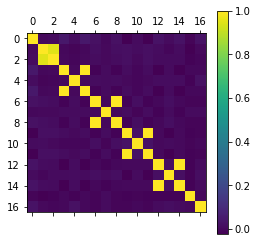

In [47]:
plt.matshow(df[col_names].corr())
plt.colorbar()
plt.show()

From the above correlation plot, we can find some highly correlated variables. `minutes` and `charge` variables have a correlation of 1. So I drop `minutes` columns and `number_vmail_messages` column.

In [94]:
new_col = ['international_plan', 'voice_mail_plan',
         'total_day_calls', 'total_day_charge',
         'total_eve_calls', 'total_eve_charge',
         'total_night_calls', 'total_night_charge',
         'total_intl_calls', 'total_intl_charge',
         'number_customer_service_calls', 'account_length']

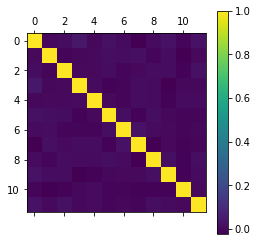

In [49]:
plt.matshow(df[new_col].corr())
plt.colorbar()
plt.show()

In [52]:
df['churn'] = np.array(df['churn'] == 'yes',dtype=np.int)
df['churn'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [53]:
np.sum(df['churn'])

598

## Logistic model - initial test of model result

Here we try none-penalty, l2-penalty and l1-penalty. Set the `class_weight`='balanced' in order to tackle unbalanced data distribution of customer churn.

In [197]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(df[new_col], df['churn'], 
                                                    test_size=0.3, random_state=0,
                                                   stratify=df['churn'])

In [199]:
def plot_roc(y_true, y_pred):
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

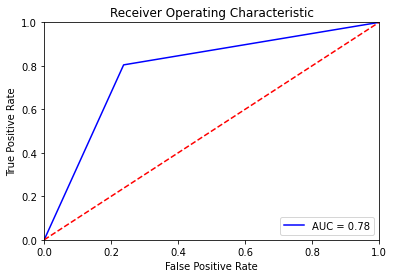

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1096
           1       0.36      0.80      0.49       179

    accuracy                           0.77      1275
   macro avg       0.66      0.78      0.67      1275
weighted avg       0.88      0.77      0.80      1275

[[836 260]
 [ 35 144]]


In [200]:
lr_model = LR(penalty='none', class_weight='balanced', tol=1e-3, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
plot_roc(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

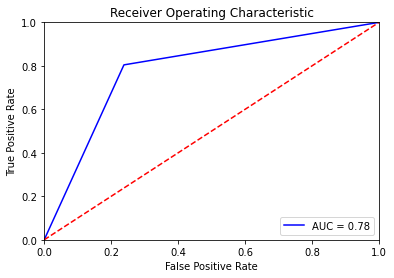

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1096
           1       0.36      0.80      0.49       179

    accuracy                           0.77      1275
   macro avg       0.66      0.78      0.67      1275
weighted avg       0.87      0.77      0.80      1275

[[835 261]
 [ 35 144]]


In [202]:
lr_model = LR(penalty='l2', class_weight='balanced', tol=1e-3, max_iter=1000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
plot_roc(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

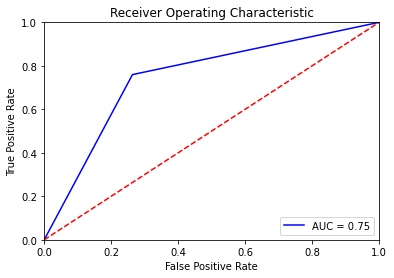

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1096
           1       0.32      0.76      0.45       179

    accuracy                           0.74      1275
   macro avg       0.63      0.75      0.64      1275
weighted avg       0.86      0.74      0.78      1275

[[807 289]
 [ 43 136]]


In [203]:
lr_model = LR(penalty='l1', class_weight='balanced', solver='saga', max_iter=4000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
plot_roc(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

## Feature engineering

In [178]:
df['day_charge_per_call'] = np.divide(df['total_day_charge'], df['total_day_calls']+1)
df['eve_charge_per_call'] = np.divide(df['total_eve_charge'], df['total_eve_calls']+1)
df['night_charge_per_call'] = np.divide(df['total_night_charge'], df['total_night_calls']+1)
df['intl_charge_per_call'] = np.divide(df['total_intl_charge'], df['total_intl_calls']+1)
df['call_per_length'] = np.divide(df['number_customer_service_calls'], df['account_length']+1)
df['total_calls'] = df['total_day_calls']+df['total_eve_calls']+df['total_night_calls']
df['intl_per_call'] = np.divide(df['total_intl_calls'], df['total_calls']+1)

df.fillna(0)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_charge,number_customer_service_calls,churn,day_charge_per_call,eve_charge_per_call,night_charge_per_call,intl_charge_per_call,call_per_length,total_calls,intl_per_call
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,...,3.70,1,0,0.221532,0.159808,0.110096,0.925000,0.009259,329,0.009091
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,...,3.29,0,0,0.359826,0.092793,0.069714,0.548333,0.000000,328,0.015198
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,...,1.78,2,0,0.706944,0.059101,0.098444,0.222500,0.023529,248,0.028112
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,...,2.73,3,0,0.248596,0.102520,0.068934,0.682500,0.039474,356,0.008403
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,...,2.03,3,0,0.416742,0.271743,0.080420,0.253750,0.024590,314,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,...,2.78,0,0,0.450845,0.232809,0.120250,0.397143,0.000000,237,0.025210
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,...,3.11,3,0,0.336000,0.134337,0.093111,0.444286,0.040541,260,0.022989
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,...,1.86,1,0,0.284510,0.129213,0.055333,0.232500,0.013158,331,0.021084
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,...,2.67,2,0,0.313047,0.149291,0.114444,0.445000,0.039216,369,0.013514


In [179]:
feature_col = new_col.copy()
feature_col.extend(['day_charge_per_call', 'eve_charge_per_call', 'night_charge_per_call', 
                    'intl_charge_per_call', 'call_per_length', 'total_calls', 'intl_per_call'])

In [204]:
feature_col

['international_plan',
 'voice_mail_plan',
 'total_day_calls',
 'total_day_charge',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_calls',
 'total_night_charge',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'account_length',
 'day_charge_per_call',
 'eve_charge_per_call',
 'night_charge_per_call',
 'intl_charge_per_call',
 'call_per_length',
 'total_calls',
 'intl_per_call']

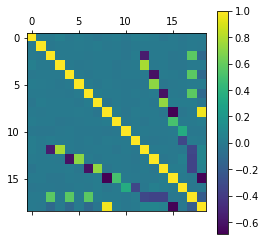

In [205]:
plt.matshow(df[feature_col].corr())
plt.colorbar()
plt.show()

In [206]:
X_train, X_test, y_train, y_test = train_test_split(df[feature_col], df['churn'], 
                                                    test_size=0.3, random_state=0,
                                                   stratify=df['churn'])

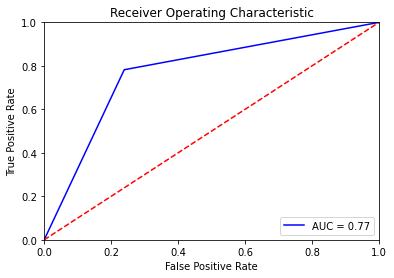

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1096
           1       0.35      0.78      0.48       179

    accuracy                           0.76      1275
   macro avg       0.65      0.77      0.66      1275
weighted avg       0.87      0.76      0.80      1275

[[834 262]
 [ 39 140]]


In [207]:
lr_model = LR(penalty='none', class_weight='balanced', tol=1e-4, max_iter=2000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
plot_roc(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

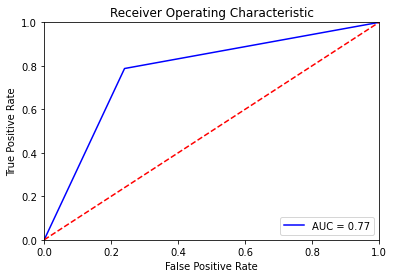

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      1096
           1       0.35      0.79      0.48       179

    accuracy                           0.76      1275
   macro avg       0.65      0.77      0.67      1275
weighted avg       0.87      0.76      0.80      1275

[[833 263]
 [ 38 141]]


In [208]:
lr_model = LR(penalty='l2', class_weight='balanced', tol=1e-4, max_iter=2000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
plot_roc(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

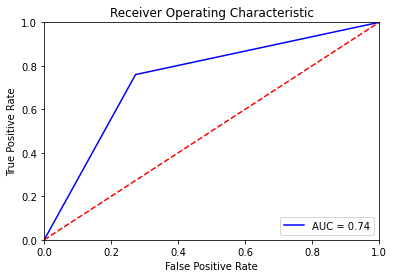

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      1096
           1       0.31      0.76      0.44       179

    accuracy                           0.73      1275
   macro avg       0.63      0.74      0.63      1275
weighted avg       0.86      0.73      0.77      1275

[[797 299]
 [ 43 136]]


In [209]:
lr_model = LR(penalty='l1', class_weight='balanced', solver='saga', tol=1e-4,max_iter=4000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
plot_roc(y_test, lr_pred)
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

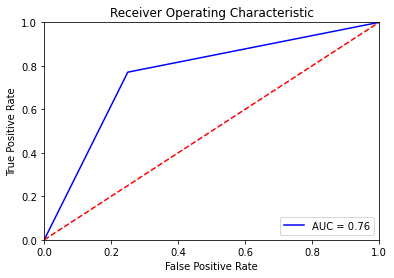

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2556
           1       0.34      0.77      0.47       419

    accuracy                           0.75      2975
   macro avg       0.64      0.76      0.65      2975
weighted avg       0.87      0.75      0.79      2975

[[1918  638]
 [  96  323]]


In [211]:
# auc of training set
lr_pred = lr_model.predict(X_train)
plot_roc(y_train, lr_pred)
print(classification_report(y_train, lr_pred))
print(confusion_matrix(y_train, lr_pred))

The above results show that after manully feature engineering, the model performance does not increase a bit.

## Generalized linear mixed model

In [229]:
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM as glmm

In [231]:
X_train.index

Int64Index([3484, 2201,  555,  244, 2616, 3874, 1734, 1198, 1872,  193,
            ...
            3706,  753, 2705, 2816, 3671,  162, 3005,  346, 1600, 4198],
           dtype='int64', length=2975)

In [237]:
vc= pd.get_dummies(df.loc[X_train.index, 'state'])
vc

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
3484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3005,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
model = glmm(endog=y_train, exog=X_train, exog_vc=vc,ident=np.arange(51))
res = model.fit()

/Users/song/miniconda3/envs/pycourse/lib/python3.8/site-packages/statsmodels/genmod/bayes_mixed_glm.py:520: UserWarning: Laplace fitting did not converge, |gradient|=0.000079
  warnings.warn(msg)


Currently, I have no idea how to predict the model.

## Test other basic machine learning models
naive bayes, SVM, neural network.

The following outcomes show that in basic machine learning models, logistic regression is good enough.

Furthermore, we can test models like Xgboost, LightGBM, and FM series models, however that far beyond this course's scope.

### Naive bayes

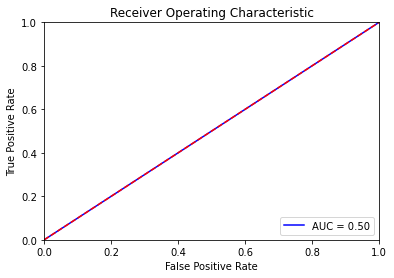

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1096
           1       0.00      0.00      0.00       179

    accuracy                           0.86      1275
   macro avg       0.43      0.50      0.46      1275
weighted avg       0.74      0.86      0.79      1275

[[1096    0]
 [ 179    0]]


/Users/song/miniconda3/envs/pycourse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
from sklearn.naive_bayes import BernoulliNB as NB

X_train, X_test, y_train, y_test = train_test_split(df[new_col], df['churn'], 
                                                    test_size=0.3, random_state=0,
                                                   stratify=df['churn'])

nb = NB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
plot_roc(y_test, nb_pred)
print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))

use feature engineering data 

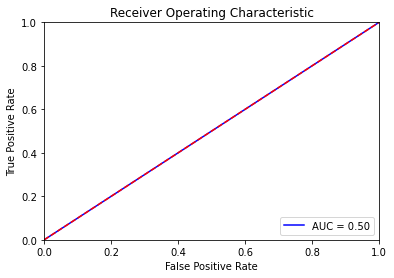

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1096
           1       0.00      0.00      0.00       179

    accuracy                           0.86      1275
   macro avg       0.43      0.50      0.46      1275
weighted avg       0.74      0.86      0.79      1275

[[1096    0]
 [ 179    0]]


/Users/song/miniconda3/envs/pycourse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
# use feature engineering data 
X_train, X_test, y_train, y_test = train_test_split(df[feature_col], df['churn'], 
                                                    test_size=0.3, random_state=0,
                                                   stratify=df['churn'])

nb = NB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
plot_roc(y_test, nb_pred)
print(classification_report(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))

### Support Vector Machine (SVM)

/Users/song/miniconda3/envs/pycourse/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


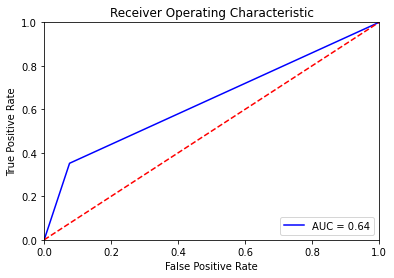

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1096
           1       0.43      0.35      0.39       179

    accuracy                           0.84      1275
   macro avg       0.66      0.64      0.65      1275
weighted avg       0.83      0.84      0.84      1275

[[1013   83]
 [ 116   63]]


In [224]:
from sklearn.svm import LinearSVC as SVC

X_train, X_test, y_train, y_test = train_test_split(df[new_col], df['churn'], 
                                                    test_size=0.3, random_state=0,
                                                   stratify=df['churn'])
svc = SVC(penalty='l2', class_weight='balanced', tol=1e-3,max_iter=1000)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
plot_roc(y_test, svc_pred)
print(classification_report(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))

### Neural network

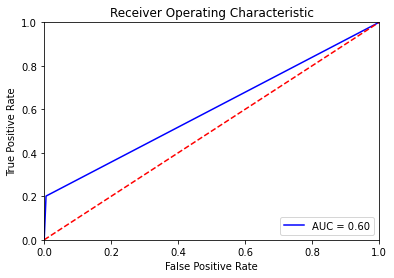

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      1096
           1       0.86      0.20      0.33       179

    accuracy                           0.88      1275
   macro avg       0.87      0.60      0.63      1275
weighted avg       0.88      0.88      0.85      1275

[[1090    6]
 [ 143   36]]


In [227]:
from sklearn.neural_network import MLPClassifier as MLP

X_train, X_test, y_train, y_test = train_test_split(df[new_col], df['churn'], 
                                                    test_size=0.3, random_state=0,
                                                   stratify=df['churn'])
mlp = MLP(hidden_layer_sizes=(100,100))
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
plot_roc(y_test, mlp_pred)
print(classification_report(y_test, mlp_pred))
print(confusion_matrix(y_test, mlp_pred))